# Práctica 1: Clasificación multi-etiqueta

## Ejercicio 3

Escribe un script en Python (car.py) que calcule para cada uno de los datasets de los dos ejercicios anteriores las siguientes medidas de caracterización de cada dataset (como mínimo los estadísticos vistos en teoría) y que las muestra en pantalla de forma ordenada: a. number of instances (n) b. number of attributes (f) c. number of labels (l) d. cardinality (car) e. density (den) f. diversity (div, represents the percentage of labelsets present in the dataset divided by the number of possible labelsets) g. average Imbalance Ratio per label (avgIR, measures the average degree of imbalance of all labels, the greater avgIR, the greater the imbalance of the dataset) h. ratio of unconditionally dependent label pairs by chi-square test (rDep, measures the proportion of pairs of labels that are dependent at 99% confidence)

### Enfoque

Para realizar este apartado se ha modificado el apartado anterior incluyendo nueva información sobre los conjuntos de datos pero dejando la información ya añadida anteriormente como la descripción del conjunto de datos o el gráfico.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skmultilearn.dataset import load_dataset

In [55]:
# Lista de nombres de los conjuntos de datos
datasets = ['scene', 'Corel5k', 'bibtex', 'enron', 'rcv1subset5', 'tmc2007_500', 'rcv1subset3', 'rcv1subset1', 'delicious', 'rcv1subset4', 'genbase', 'birds', 'emotions', 'rcv1subset2', 'mediamill', 'medical', 'yeast']

### Funciones para visualizar los conjuntos de datos

- `get_dataset_info`: Muestra información general del conjunto de datos para conocer sus dimensiones y nombres de las etiquetas.
- `visualize_label_number`: Muestra en un gráfico el número de etiquetas que tiene cada instancia, también muestra la media de etiquetas por instancia. Es una gráfica que permite comprobar el nivel de multietiqueta de cada conjunto.

In [23]:
def get_dataset_info(dataset):
    X, y, _, label_names = load_dataset(dataset, 'undivided')
    
    print('Número de instancias en {}: {}'.format(dataset, X.shape[0]))
    print('Número de atributos en {}: {}'.format(dataset, X.shape[1]))
    print('Número de etiquetas en {}: {}'.format(dataset, y.shape[1]))
    
    # Cardinalidad
    cardinality = np.mean(np.sum(y, axis=1))
    print('Car en {}: {}'.format(dataset, cardinality))
    
    # Densidad
    density = np.mean(np.sum(y, axis=1) / y.shape[1])
    print('Den en {}: {}'.format(dataset, density))
    
    # Diversidad
    diversity = np.mean(np.sum(y > 0, axis=1) / 2**y.shape[1])
    print('Div en {}: {}'.format(dataset, diversity))
    
    # AvgIR (Average Imbalance Ratio)
    avgIR = np.mean(np.sum(y, axis=0) / np.sum(y))
    print('AvgIR en {}: {}'.format(dataset, avgIR))
    
    # rDep (Ratio of unconditionally dependent label pairs by chi-square test)
    label_correlation = np.corrcoef(y.T)
    chi_square_test = np.mean(np.abs(label_correlation > 0.99)) / y.shape[1]
    print('rDep en {}: {}'.format(dataset, chi_square_test))
    
    print("\n")
    print("\n")
    
    # Información extra
    print('Nombres de etiquetas en {}: \n{}'.format(dataset, label_names))
    
    # Visualización de la distribución de clases
    class_distribution = np.sum(y, axis=0)
    plt.bar(range(len(class_distribution)), class_distribution)
    plt.xlabel('Índice de etiqueta')
    plt.ylabel('Número de instancias')
    plt.title('Distribución de clases en {}'.format(dataset))
    plt.show()
    
    # Ejemplos de instancias
    sample_instances = X[:5]  # Primeras 5 instancias
    print('Ejemplos de instancias en {}: \n{}'.format(dataset, sample_instances))

get_dataset_info("scene")

scene:undivided - exists, not redownloading
Número de instancias en scene: 2407
Número de atributos en scene: 294
Número de etiquetas en scene: 6
Car en scene: 1.0739509763190693
Den en scene: 0.1789918293865116
Div en scene: 0.016780484004985458
AvgIR en scene: 0.16666666666666666


AttributeError: 'float' object has no attribute 'shape'

scene:undivided - exists, not redownloading
Número de instancias en scene: 2407
Número de atributos en scene: 294
Número de etiquetas en scene: 6
Car en scene: 1.0739509763190693
Den en scene: 0.1789918293865116
Div en scene: 0.016780484004985458
AvgIR en scene: 0.16666666666666666


AttributeError: 'float' object has no attribute 'shape'

In [10]:
# Visualizar para cada conjunto de datos
def visualize_label_number(dataset):
    # Cargar el conjunto de datos
    X, y, feature_names, label_names = load_dataset(dataset, 'undivided')

    # Obtener el número de etiquetas por instancia
    labels_per_instance = np.sum(y, axis=1)

    # Mostrar histograma
    plt.hist(labels_per_instance, bins=range(0, 30, 1))

    # Agregar la media como texto
    plt.text(0.5, 0.95, f'Media de etiquetas por instancia: {np.mean(labels_per_instance):.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))
    plt.title(dataset)
    plt.xlabel('Número de etiquetas por instancia')
    plt.ylabel('Número de instancias')
    plt.show()

    # Mostrar media
    #print('Media de etiquetas por instancia en {}: {}'.format(dataset, np.mean(labels_per_instance)))

#### [Scene](https://www.uco.es/kdis/mllresources/#SceneDesc)

Es un conjunto de datos de imágenes que contiene 2407 imágenes, anotadas en hasta 6 clases: playa, atardecer, follaje de otoño, campo, montaña y urbano. Cada imagen se describe con 294 características numéricas visuales correspondientes a momentos de color espaciales en el espacio LUV.

In [15]:
dataset_name = "scene"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

scene:undivided - exists, not redownloading
Número de instancias en scene: 2407
Número de atributos en scene: 294
Número de etiquetas en scene: 6
Cardinalidad en scene: 1.0739509763190693
Densidad en scene: 0.1789918293865116
Diversidad en scene: 0.016780484004985458
Average Imbalance Ratio por etiqueta en scene: 0.16666666666666666


AttributeError: 'float' object has no attribute 'shape'

#### [Corel5k](https://www.uco.es/kdis/mllresources/#Corel5kDesc)

Corel5k es un cojunto de datos de benchmark para los métodos de clasificación y anotación de imágenes. Está basado en 5000 imágenes de Corel.

Corel5k:undivided - exists, not redownloading
Número de instancias en Corel5k: 5000
Número de atributos en Corel5k: 499
Número de etiquetas en Corel5k: 374


Nombres de etiquetas en Corel5k: 

[('city', ['0', '1']), ('mountain', ['0', '1']), ('sky', ['0', '1']), ('sun', ['0', '1']), ('water', ['0', '1']), ('clouds', ['0', '1']), ('tree', ['0', '1']), ('bay', ['0', '1']), ('lake', ['0', '1']), ('sea', ['0', '1']), ('beach', ['0', '1']), ('boats', ['0', '1']), ('people', ['0', '1']), ('branch', ['0', '1']), ('leaf', ['0', '1']), ('grass', ['0', '1']), ('plain', ['0', '1']), ('palm', ['0', '1']), ('horizon', ['0', '1']), ('shell', ['0', '1']), ('hills', ['0', '1']), ('waves', ['0', '1']), ('birds', ['0', '1']), ('land', ['0', '1']), ('dog', ['0', '1']), ('bridge', ['0', '1']), ('ships', ['0', '1']), ('buildings', ['0', '1']), ('fence', ['0', '1']), ('island', ['0', '1']), ('storm', ['0', '1']), ('peaks', ['0', '1']), ('jet', ['0', '1']), ('plane', ['0', '1']), ('runway', ['0', '1']), ('ba

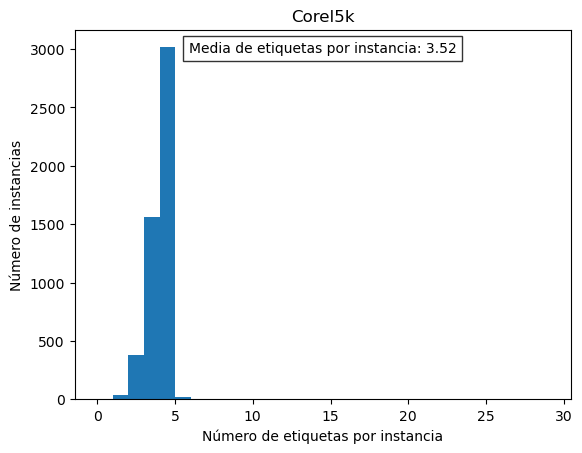

In [62]:
dataset_name = "Corel5k"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

##### [bibtex](https://www.uco.es/kdis/mllresources/#BibtexDesc)

Este conjunto de datos se basa en los datos del reto ECML/PKDD 2008. Contiene 7395 entradas bibtex del sistema de intercambio de publicaciones y marcadores sociales de BibSonomy, anotadas con un subconjunto de etiquetas asignadas por los usuarios de BibSonomy.

bibtex:undivided - exists, not redownloading
Número de instancias en bibtex: 7395
Número de atributos en bibtex: 1836
Número de etiquetas en bibtex: 159


Nombres de etiquetas en bibtex: 

[('TAG_2005', ['0', '1']), ('TAG_2006', ['0', '1']), ('TAG_2007', ['0', '1']), ('TAG_agdetection', ['0', '1']), ('TAG_algorithms', ['0', '1']), ('TAG_amperometry', ['0', '1']), ('TAG_analysis', ['0', '1']), ('TAG_and', ['0', '1']), ('TAG_annotation', ['0', '1']), ('TAG_antibody', ['0', '1']), ('TAG_apob', ['0', '1']), ('TAG_architecture', ['0', '1']), ('TAG_article', ['0', '1']), ('TAG_bettasplendens', ['0', '1']), ('TAG_bibteximport', ['0', '1']), ('TAG_book', ['0', '1']), ('TAG_children', ['0', '1']), ('TAG_classification', ['0', '1']), ('TAG_clustering', ['0', '1']), ('TAG_cognition', ['0', '1']), ('TAG_collaboration', ['0', '1']), ('TAG_collaborative', ['0', '1']), ('TAG_community', ['0', '1']), ('TAG_competition', ['0', '1']), ('TAG_complex', ['0', '1']), ('TAG_complexity', ['0', '1']), ('TAG_co

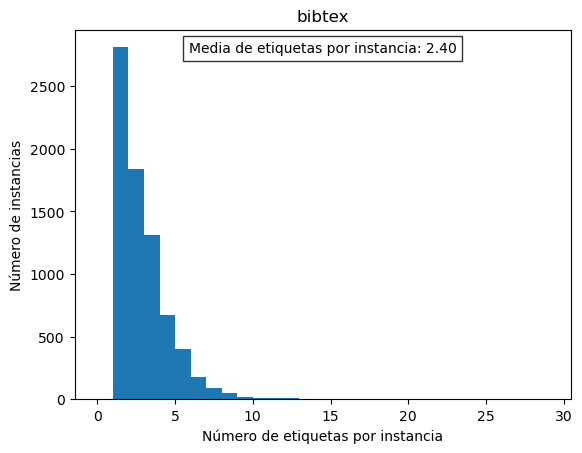

In [63]:
dataset_name = "bibtex"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### [enron](https://www.uco.es/kdis/mllresources/#EnronDesc)

El conjunto de datos de Enron es un subconjunto del Corpus de correo electrónico de Enron, etiquetado con un conjunto de categorías. Se basa en una colección de mensajes de correo electrónico que se clasificaron en 53 categorías temáticas, como estrategia de la empresa, humor y asesoramiento legal.

Aunque las etiquetas que se pueden observar en el conjunto de datos cargados no se corresponden con este tipo de palabras sino con claves que deben representar estas etiquetas.

enron:undivided - exists, not redownloading
Número de instancias en enron: 1702
Número de atributos en enron: 1001
Número de etiquetas en enron: 53


Nombres de etiquetas en enron: 

[('A.A8', ['0', '1']), ('C.C9', ['0', '1']), ('B.B12', ['0', '1']), ('C.C11', ['0', '1']), ('C.C5', ['0', '1']), ('C.C7', ['0', '1']), ('B.B2', ['0', '1']), ('B.B3', ['0', '1']), ('D.D16', ['0', '1']), ('A.A7', ['0', '1']), ('D.D1', ['0', '1']), ('A.A4', ['0', '1']), ('C.C2', ['0', '1']), ('A.A3', ['0', '1']), ('A.A1', ['0', '1']), ('D.D9', ['0', '1']), ('D.D19', ['0', '1']), ('B.B8', ['0', '1']), ('D.D12', ['0', '1']), ('D.D6', ['0', '1']), ('C.C8', ['0', '1']), ('A.A6', ['0', '1']), ('B.B9', ['0', '1']), ('A.A5', ['0', '1']), ('C.C10', ['0', '1']), ('B.B1', ['0', '1']), ('D.D5', ['0', '1']), ('B.B11', ['0', '1']), ('D.D2', ['0', '1']), ('B.B4', ['0', '1']), ('D.D15', ['0', '1']), ('C.C4', ['0', '1']), ('D.D8', ['0', '1']), ('B.B6', ['0', '1']), ('D.D3', ['0', '1']), ('D.D13', ['0', '1']), ('D.D7', ['0', 

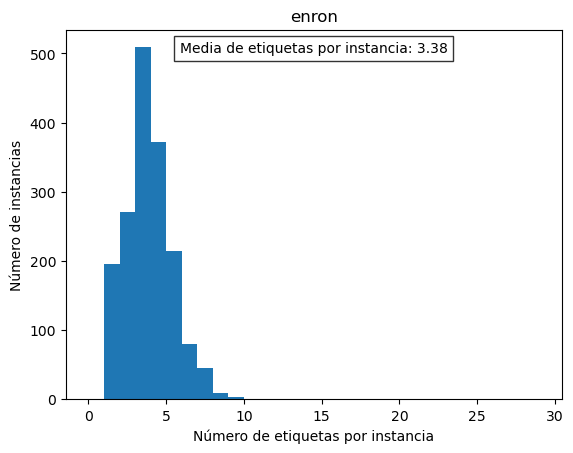

In [64]:
dataset_name = "enron"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### [rcv1subset5](https://www.uco.es/kdis/mllresources/#rcv1)

Este conjunto de datos es un subconjunto de datos pertenetiente a un conjunto de benchmarking conocido para los métodos de clasificación de texto. El conjunto principal tiene 5 subconjuntos, cada uno con 6000 artículos asignados a uno o más de 101 temas. El conjunto de datos Reuters-K500 se obtuvo seleccionando 500 características aplicando el método propuesto en [Tsoumakas et al. 2007].

rcv1subset5:undivided - exists, not redownloading
Número de instancias en rcv1subset5: 6000
Número de atributos en rcv1subset5: 47235
Número de etiquetas en rcv1subset5: 101


Nombres de etiquetas en rcv1subset5: 

[('Class1', ['0', '1']), ('Class2', ['0', '1']), ('Class3', ['0', '1']), ('Class4', ['0', '1']), ('Class5', ['0', '1']), ('Class6', ['0', '1']), ('Class7', ['0', '1']), ('Class8', ['0', '1']), ('Class9', ['0', '1']), ('Class10', ['0', '1']), ('Class11', ['0', '1']), ('Class12', ['0', '1']), ('Class13', ['0', '1']), ('Class14', ['0', '1']), ('Class15', ['0', '1']), ('Class16', ['0', '1']), ('Class17', ['0', '1']), ('Class18', ['0', '1']), ('Class19', ['0', '1']), ('Class20', ['0', '1']), ('Class21', ['0', '1']), ('Class22', ['0', '1']), ('Class23', ['0', '1']), ('Class24', ['0', '1']), ('Class25', ['0', '1']), ('Class26', ['0', '1']), ('Class27', ['0', '1']), ('Class28', ['0', '1']), ('Class29', ['0', '1']), ('Class30', ['0', '1']), ('Class31', ['0', '1']), ('Class32', ['0', 

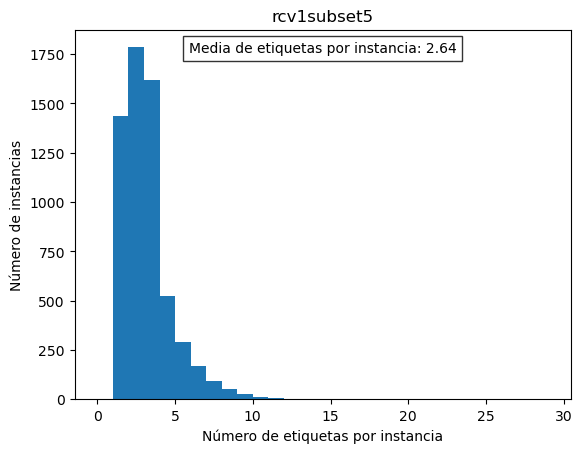

In [65]:
dataset_name = "rcv1subset5"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### [tmc2007_500](https://www.uco.es/kdis/mllresources/#tmc2007Desc)

Es un subconjunto del conjunto de datos del Sistema de informes de seguridad aérea. tmc2007 Contiene 28596 informes de texto libre sobre seguridad de la aviación que la tripulación de vuelo envía después de cada vuelo sobre eventos que tuvieron lugar durante el vuelo. El objetivo es etiquetar los documentos con respecto a los tipos de problemas que describen. Este conjunto de datos tiene 49060 atributos discretos correspondientes a términos de la colección. Los informes de seguridad cuentan con 22 etiquetas, cada una de las cuales representa un tipo de problema que aparece durante un vuelo. 

El conjunto de datos TMC2007-500 es un subconjunto de tcm2007, se obtuvo mediante una selección de las 500 características principales.

tmc2007_500:undivided - exists, not redownloading
Número de instancias en tmc2007_500: 28596
Número de atributos en tmc2007_500: 500
Número de etiquetas en tmc2007_500: 22


Nombres de etiquetas en tmc2007_500: 

[('class01', ['0', '1']), ('class02', ['0', '1']), ('class03', ['0', '1']), ('class04', ['0', '1']), ('class05', ['0', '1']), ('class06', ['0', '1']), ('class07', ['0', '1']), ('class08', ['0', '1']), ('class09', ['0', '1']), ('class10', ['0', '1']), ('class11', ['0', '1']), ('class12', ['0', '1']), ('class13', ['0', '1']), ('class14', ['0', '1']), ('class15', ['0', '1']), ('class16', ['0', '1']), ('class17', ['0', '1']), ('class18', ['0', '1']), ('class19', ['0', '1']), ('class20', ['0', '1']), ('class21', ['0', '1']), ('class22', ['0', '1'])]
tmc2007_500:undivided - exists, not redownloading


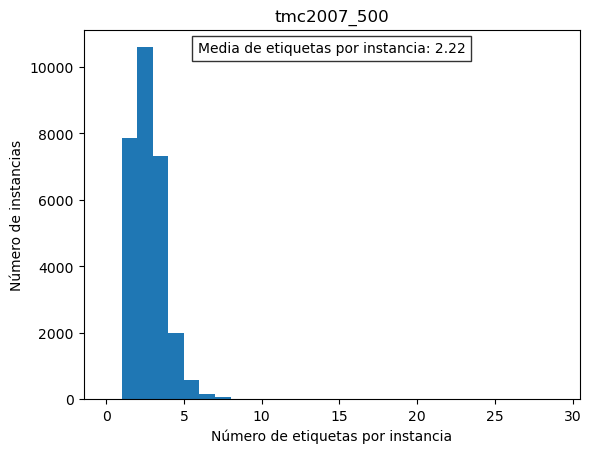

In [66]:
dataset_name = "tmc2007_500"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### rcv1subset3

Este conjunto de datos es un subconjunto de datos pertenetiente a un conjunto de benchmarking conocido para los métodos de clasificación de texto. El conjunto principal tiene 5 subconjuntos, cada uno con 6000 artículos asignados a uno o más de 101 temas. El conjunto de datos Reuters-K500 se obtuvo seleccionando 500 características aplicando el método propuesto en [Tsoumakas et al. 2007].

rcv1subset3:undivided - exists, not redownloading
Número de instancias en rcv1subset3: 6000
Número de atributos en rcv1subset3: 47236
Número de etiquetas en rcv1subset3: 101


Nombres de etiquetas en rcv1subset3: 

[('Class1', ['0', '1']), ('Class2', ['0', '1']), ('Class3', ['0', '1']), ('Class4', ['0', '1']), ('Class5', ['0', '1']), ('Class6', ['0', '1']), ('Class7', ['0', '1']), ('Class8', ['0', '1']), ('Class9', ['0', '1']), ('Class10', ['0', '1']), ('Class11', ['0', '1']), ('Class12', ['0', '1']), ('Class13', ['0', '1']), ('Class14', ['0', '1']), ('Class15', ['0', '1']), ('Class16', ['0', '1']), ('Class17', ['0', '1']), ('Class18', ['0', '1']), ('Class19', ['0', '1']), ('Class20', ['0', '1']), ('Class21', ['0', '1']), ('Class22', ['0', '1']), ('Class23', ['0', '1']), ('Class24', ['0', '1']), ('Class25', ['0', '1']), ('Class26', ['0', '1']), ('Class27', ['0', '1']), ('Class28', ['0', '1']), ('Class29', ['0', '1']), ('Class30', ['0', '1']), ('Class31', ['0', '1']), ('Class32', ['0', 

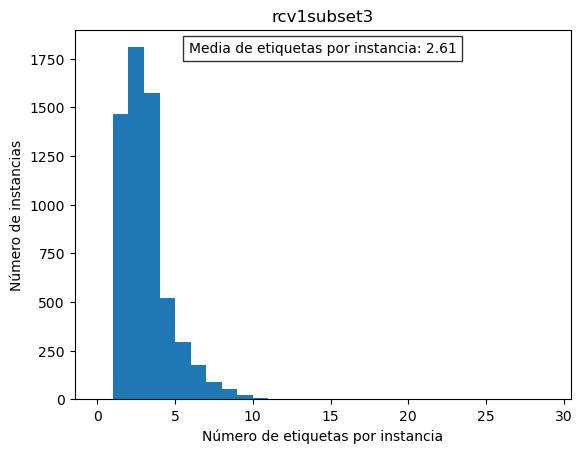

In [67]:
dataset_name = "rcv1subset3"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### rcv1subset1

Este conjunto de datos es un subconjunto de datos pertenetiente a un conjunto de benchmarking conocido para los métodos de clasificación de texto. El conjunto principal tiene 5 subconjuntos, cada uno con 6000 artículos asignados a uno o más de 101 temas. El conjunto de datos Reuters-K500 se obtuvo seleccionando 500 características aplicando el método propuesto en [Tsoumakas et al. 2007].

rcv1subset1:undivided - exists, not redownloading
Número de instancias en rcv1subset1: 6000
Número de atributos en rcv1subset1: 47236
Número de etiquetas en rcv1subset1: 101


Nombres de etiquetas en rcv1subset1: 

[('Class1', ['0', '1']), ('Class2', ['0', '1']), ('Class3', ['0', '1']), ('Class4', ['0', '1']), ('Class5', ['0', '1']), ('Class6', ['0', '1']), ('Class7', ['0', '1']), ('Class8', ['0', '1']), ('Class9', ['0', '1']), ('Class10', ['0', '1']), ('Class11', ['0', '1']), ('Class12', ['0', '1']), ('Class13', ['0', '1']), ('Class14', ['0', '1']), ('Class15', ['0', '1']), ('Class16', ['0', '1']), ('Class17', ['0', '1']), ('Class18', ['0', '1']), ('Class19', ['0', '1']), ('Class20', ['0', '1']), ('Class21', ['0', '1']), ('Class22', ['0', '1']), ('Class23', ['0', '1']), ('Class24', ['0', '1']), ('Class25', ['0', '1']), ('Class26', ['0', '1']), ('Class27', ['0', '1']), ('Class28', ['0', '1']), ('Class29', ['0', '1']), ('Class30', ['0', '1']), ('Class31', ['0', '1']), ('Class32', ['0', 

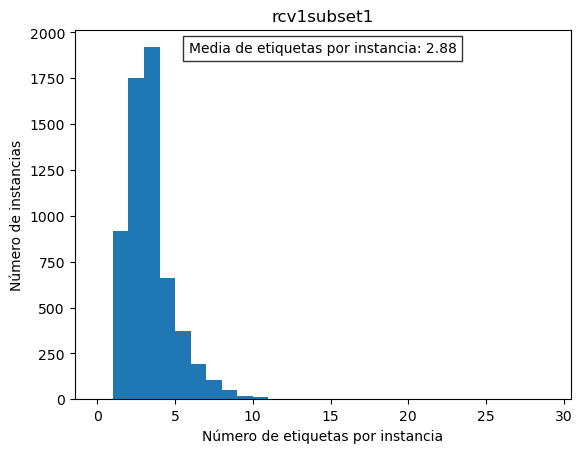

In [68]:
dataset_name = "rcv1subset1"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### [delicious](https://www.uco.es/kdis/mllresources/#DeliciousDesc)

Este conjunto de datos contiene datos textuales de páginas web junto con sus etiquetas.

delicious:undivided - exists, not redownloading
Número de instancias en delicious: 16105
Número de atributos en delicious: 500
Número de etiquetas en delicious: 983


Nombres de etiquetas en delicious: 

[('TAG_.imported', ['0', '1']), ('TAG_.net', ['0', '1']), ('TAG_2.0', ['0', '1']), ('TAG_2007', ['0', '1']), ('TAG_3d', ['0', '1']), ('TAG_??', ['0', '1']), ('TAG_???', ['0', '1']), ('TAG_????', ['0', '1']), ('TAG_academia', ['0', '1']), ('TAG_academic', ['0', '1']), ('TAG_access', ['0', '1']), ('TAG_accessibility', ['0', '1']), ('TAG_accessories', ['0', '1']), ('TAG_accounts', ['0', '1']), ('TAG_actionscript', ['0', '1']), ('TAG_activism', ['0', '1']), ('TAG_ad', ['0', '1']), ('TAG_addon', ['0', '1']), ('TAG_addons', ['0', '1']), ('TAG_admin', ['0', '1']), ('TAG_administration', ['0', '1']), ('TAG_adobe', ['0', '1']), ('TAG_ads', ['0', '1']), ('TAG_adsense', ['0', '1']), ('TAG_adult', ['0', '1']), ('TAG_advertising', ['0', '1']), ('TAG_advice', ['0', '1']), ('TAG_affiliate', ['0', '1'

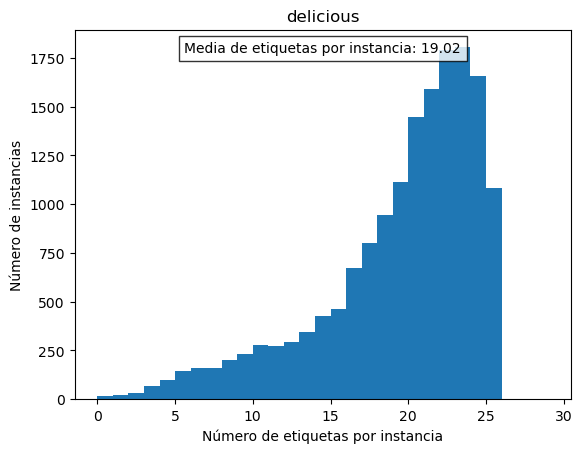

In [69]:
dataset_name = "delicious"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### rcv1subset4

Este conjunto de datos es un subconjunto de datos pertenetiente a un conjunto de benchmarking conocido para los métodos de clasificación de texto. El conjunto principal tiene 5 subconjuntos, cada uno con 6000 artículos asignados a uno o más de 101 temas. El conjunto de datos Reuters-K500 se obtuvo seleccionando 500 características aplicando el método propuesto en [Tsoumakas et al. 2007].

rcv1subset4:undivided - exists, not redownloading
Número de instancias en rcv1subset4: 6000
Número de atributos en rcv1subset4: 47229
Número de etiquetas en rcv1subset4: 101


Nombres de etiquetas en rcv1subset4: 

[('Class1', ['0', '1']), ('Class2', ['0', '1']), ('Class3', ['0', '1']), ('Class4', ['0', '1']), ('Class5', ['0', '1']), ('Class6', ['0', '1']), ('Class7', ['0', '1']), ('Class8', ['0', '1']), ('Class9', ['0', '1']), ('Class10', ['0', '1']), ('Class11', ['0', '1']), ('Class12', ['0', '1']), ('Class13', ['0', '1']), ('Class14', ['0', '1']), ('Class15', ['0', '1']), ('Class16', ['0', '1']), ('Class17', ['0', '1']), ('Class18', ['0', '1']), ('Class19', ['0', '1']), ('Class20', ['0', '1']), ('Class21', ['0', '1']), ('Class22', ['0', '1']), ('Class23', ['0', '1']), ('Class24', ['0', '1']), ('Class25', ['0', '1']), ('Class26', ['0', '1']), ('Class27', ['0', '1']), ('Class28', ['0', '1']), ('Class29', ['0', '1']), ('Class30', ['0', '1']), ('Class31', ['0', '1']), ('Class32', ['0', 

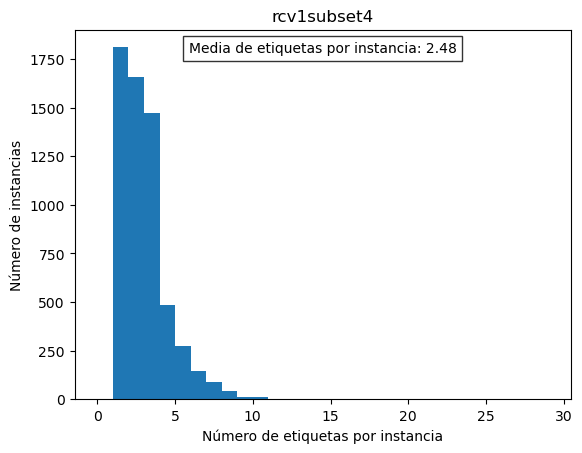

In [70]:
dataset_name = "rcv1subset4"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### [genbase](https://www.uco.es/kdis/mllresources/#GenbaseDesc)

Es un conjunto de datos para la clasificación de funciones de proteínas. Cada instancia es una proteína y cada etiqueta es una clase de proteína. Este conjunto de datos es pequeño en comparación con la gran cantidad de etiquetas.

genbase:undivided - exists, not redownloading
Número de instancias en genbase: 662
Número de atributos en genbase: 1186
Número de etiquetas en genbase: 27


Nombres de etiquetas en genbase: 

[('PDOC00154', ['0', '1']), ('PDOC00343', ['0', '1']), ('PDOC00271', ['0', '1']), ('PDOC00064', ['0', '1']), ('PDOC00791', ['0', '1']), ('PDOC00380', ['0', '1']), ('PDOC50007', ['0', '1']), ('PDOC00224', ['0', '1']), ('PDOC00100', ['0', '1']), ('PDOC00670', ['0', '1']), ('PDOC50002', ['0', '1']), ('PDOC50106', ['0', '1']), ('PDOC00561', ['0', '1']), ('PDOC50017', ['0', '1']), ('PDOC50003', ['0', '1']), ('PDOC50006', ['0', '1']), ('PDOC50156', ['0', '1']), ('PDOC00662', ['0', '1']), ('PDOC00018', ['0', '1']), ('PDOC50001', ['0', '1']), ('PDOC00014', ['0', '1']), ('PDOC00750', ['0', '1']), ('PDOC50196', ['0', '1']), ('PDOC50199', ['0', '1']), ('PDOC00660', ['0', '1']), ('PDOC00653', ['0', '1']), ('PDOC00030', ['0', '1'])]
genbase:undivided - exists, not redownloading


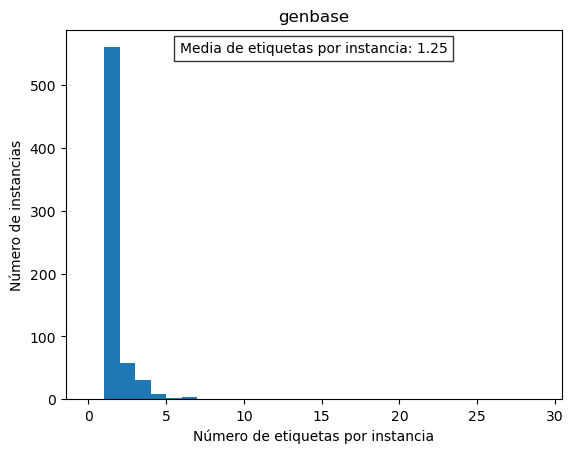

In [71]:
dataset_name = "genbase"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### [birds](https://www.uco.es/kdis/mllresources/#BirdsDesc)

Es un conjunto de datos para predecir el conjunto de especies de aves que están presentes, dado un clip de audio de diez segundos.

birds:undivided - exists, not redownloading
Número de instancias en birds: 645
Número de atributos en birds: 260
Número de etiquetas en birds: 19


Nombres de etiquetas en birds: 

[('Brown Creeper', ['0', '1']), ('Pacific Wren', ['0', '1']), ('Pacific-slope Flycatcher', ['0', '1']), ('Red-breasted Nuthatch', ['0', '1']), ('Dark-eyed Junco', ['0', '1']), ('Olive-sided Flycatcher', ['0', '1']), ('Hermit Thrush', ['0', '1']), ('Chestnut-backed Chickadee', ['0', '1']), ('Varied Thrush', ['0', '1']), ('Hermit Warbler', ['0', '1']), ("Swainson\\'s Thrush", ['0', '1']), ("Hammond\\'s Flycatcher", ['0', '1']), ('Western Tanager', ['0', '1']), ('Black-headed Grosbeak', ['0', '1']), ('Golden Crowned Kinglet', ['0', '1']), ('Warbling Vireo', ['0', '1']), ("MacGillivray\\'s Warbler", ['0', '1']), ("Stellar\\'s Jay", ['0', '1']), ('Common Nighthawk', ['0', '1'])]
birds:undivided - exists, not redownloading


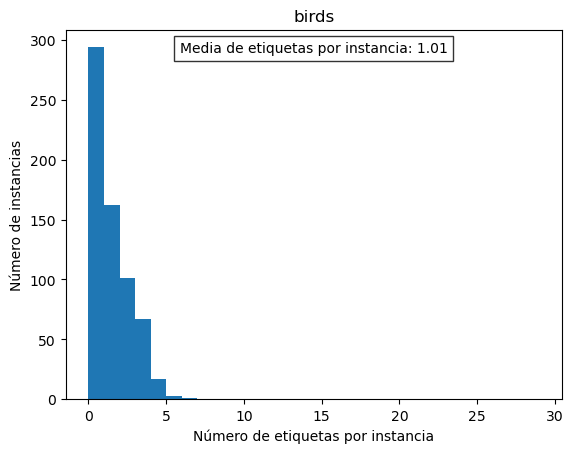

In [72]:
dataset_name = "birds"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### [emotions](https://www.uco.es/kdis/mllresources/#EmotionsDesc)

También llamado Música en [Read 2010]. Es un pequeño conjunto de datos para clasificar la música según las emociones que producen según el modelo de estado de ánimo de Tellegen-Watson-Clark: asombrado-sorprendido, feliz-complacido, relajante-calmado, tranquilo-quieto, triste-solitario y enfadado-agresivo. Consta de 593 canciones con 6 clases.

emotions:undivided - exists, not redownloading
Número de instancias en emotions: 593
Número de atributos en emotions: 72
Número de etiquetas en emotions: 6


Nombres de etiquetas en emotions: 

[('amazed-suprised', ['0', '1']), ('happy-pleased', ['0', '1']), ('relaxing-calm', ['0', '1']), ('quiet-still', ['0', '1']), ('sad-lonely', ['0', '1']), ('angry-aggresive', ['0', '1'])]
emotions:undivided - exists, not redownloading


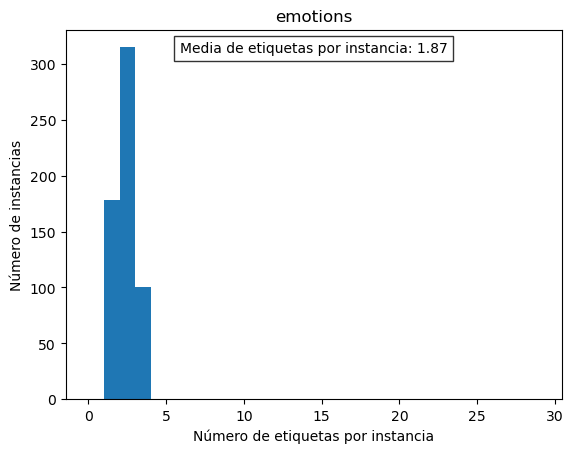

In [73]:
dataset_name = "emotions"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### rcv1subset2

Este conjunto de datos es un subconjunto de datos pertenetiente a un conjunto de benchmarking conocido para los métodos de clasificación de texto. El conjunto principal tiene 5 subconjuntos, cada uno con 6000 artículos asignados a uno o más de 101 temas. El conjunto de datos Reuters-K500 se obtuvo seleccionando 500 características aplicando el método propuesto en [Tsoumakas et al. 2007].

rcv1subset2:undivided - exists, not redownloading
Número de instancias en rcv1subset2: 6000
Número de atributos en rcv1subset2: 47236
Número de etiquetas en rcv1subset2: 101


Nombres de etiquetas en rcv1subset2: 

[('Class1', ['0', '1']), ('Class2', ['0', '1']), ('Class3', ['0', '1']), ('Class4', ['0', '1']), ('Class5', ['0', '1']), ('Class6', ['0', '1']), ('Class7', ['0', '1']), ('Class8', ['0', '1']), ('Class9', ['0', '1']), ('Class10', ['0', '1']), ('Class11', ['0', '1']), ('Class12', ['0', '1']), ('Class13', ['0', '1']), ('Class14', ['0', '1']), ('Class15', ['0', '1']), ('Class16', ['0', '1']), ('Class17', ['0', '1']), ('Class18', ['0', '1']), ('Class19', ['0', '1']), ('Class20', ['0', '1']), ('Class21', ['0', '1']), ('Class22', ['0', '1']), ('Class23', ['0', '1']), ('Class24', ['0', '1']), ('Class25', ['0', '1']), ('Class26', ['0', '1']), ('Class27', ['0', '1']), ('Class28', ['0', '1']), ('Class29', ['0', '1']), ('Class30', ['0', '1']), ('Class31', ['0', '1']), ('Class32', ['0', 

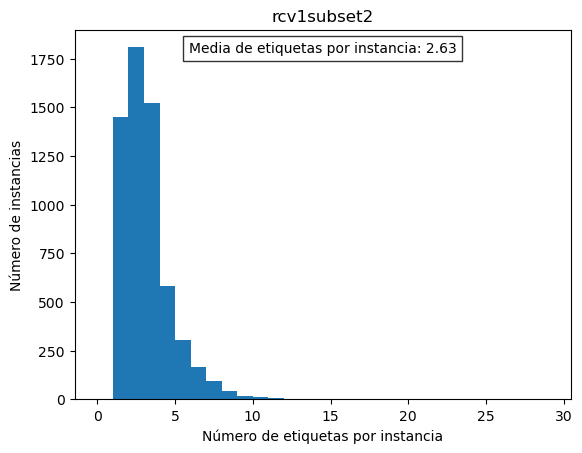

In [74]:
dataset_name = "rcv1subset2"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### [mediamill](https://www.uco.es/kdis/mllresources/#MediamillDesc)

Es un conjunto de datos multimedia para indexación de videos genéricos, que se extrajo del benchmark TRECVID 2005/2006. Este conjunto de datos contiene 85 horas de datos de noticias de transmisión internacional categorizados en 100 etiquetas y cada instancia de video se representa como un vector de características numéricas de 120 dimensiones.

mediamill:undivided - exists, not redownloading
Número de instancias en mediamill: 43907
Número de atributos en mediamill: 120
Número de etiquetas en mediamill: 101


Nombres de etiquetas en mediamill: 

[('Class1', ['0', '1']), ('Class2', ['0', '1']), ('Class3', ['0', '1']), ('Class4', ['0', '1']), ('Class5', ['0', '1']), ('Class6', ['0', '1']), ('Class7', ['0', '1']), ('Class8', ['0', '1']), ('Class9', ['0', '1']), ('Class10', ['0', '1']), ('Class11', ['0', '1']), ('Class12', ['0', '1']), ('Class13', ['0', '1']), ('Class14', ['0', '1']), ('Class15', ['0', '1']), ('Class16', ['0', '1']), ('Class17', ['0', '1']), ('Class18', ['0', '1']), ('Class19', ['0', '1']), ('Class20', ['0', '1']), ('Class21', ['0', '1']), ('Class22', ['0', '1']), ('Class23', ['0', '1']), ('Class24', ['0', '1']), ('Class25', ['0', '1']), ('Class26', ['0', '1']), ('Class27', ['0', '1']), ('Class28', ['0', '1']), ('Class29', ['0', '1']), ('Class30', ['0', '1']), ('Class31', ['0', '1']), ('Class32', ['0', '1']), ('Cl

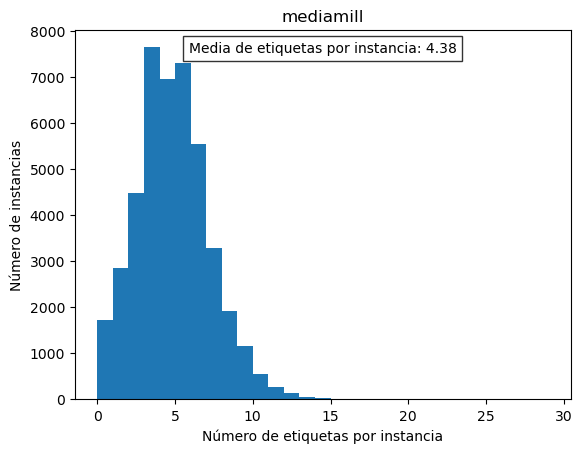

In [75]:
dataset_name = "mediamill"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### [medical](https://www.uco.es/kdis/mllresources/#MedicalDesc)

El conjunto de datos se basa en los datos disponibles durante el Computational Medicine Centers 2007 Medical Natural Language Processing Challenge 10. Consta de 978 informes clínicos de texto libre etiquetados con uno o más de 45 códigos de enfermedad.

medical:undivided - exists, not redownloading
Número de instancias en medical: 978
Número de atributos en medical: 1449
Número de etiquetas en medical: 45


Nombres de etiquetas en medical: 

[('Class-0-593_70', ['0', '1']), ('Class-1-079_99', ['0', '1']), ('Class-2-786_09', ['0', '1']), ('Class-3-759_89', ['0', '1']), ('Class-4-753_0', ['0', '1']), ('Class-5-786_2', ['0', '1']), ('Class-6-V72_5', ['0', '1']), ('Class-7-511_9', ['0', '1']), ('Class-8-596_8', ['0', '1']), ('Class-9-599_0', ['0', '1']), ('Class-10-518_0', ['0', '1']), ('Class-11-593_5', ['0', '1']), ('Class-12-V13_09', ['0', '1']), ('Class-13-791_0', ['0', '1']), ('Class-14-789_00', ['0', '1']), ('Class-15-593_1', ['0', '1']), ('Class-16-462', ['0', '1']), ('Class-17-592_0', ['0', '1']), ('Class-18-786_59', ['0', '1']), ('Class-19-785_6', ['0', '1']), ('Class-20-V67_09', ['0', '1']), ('Class-21-795_5', ['0', '1']), ('Class-22-789_09', ['0', '1']), ('Class-23-786_50', ['0', '1']), ('Class-24-596_54', ['0', '1']), ('Class-

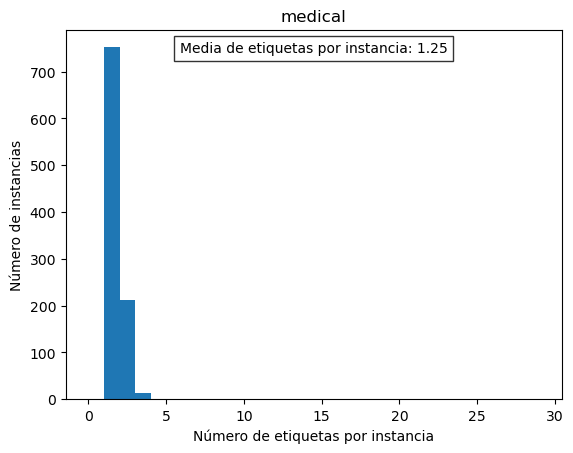

In [76]:
dataset_name = "medical"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)

#### [yeast](https://www.uco.es/kdis/mllresources/#YeastDesc)

Este conjunto de datos contiene expresiones de micromatrices y perfiles filogenéticos para 2417 genes de levadura. Cada gen está anotado con un subconjunto de 14 categorías funcionales (por ejemplo, metabolismo, energía, etc.) del nivel superior del catálogo funcional.

yeast:undivided - exists, not redownloading
Número de instancias en yeast: 2417
Número de atributos en yeast: 103
Número de etiquetas en yeast: 14


Nombres de etiquetas en yeast: 

[('Class1', ['0', '1']), ('Class2', ['0', '1']), ('Class3', ['0', '1']), ('Class4', ['0', '1']), ('Class5', ['0', '1']), ('Class6', ['0', '1']), ('Class7', ['0', '1']), ('Class8', ['0', '1']), ('Class9', ['0', '1']), ('Class10', ['0', '1']), ('Class11', ['0', '1']), ('Class12', ['0', '1']), ('Class13', ['0', '1']), ('Class14', ['0', '1'])]
yeast:undivided - exists, not redownloading


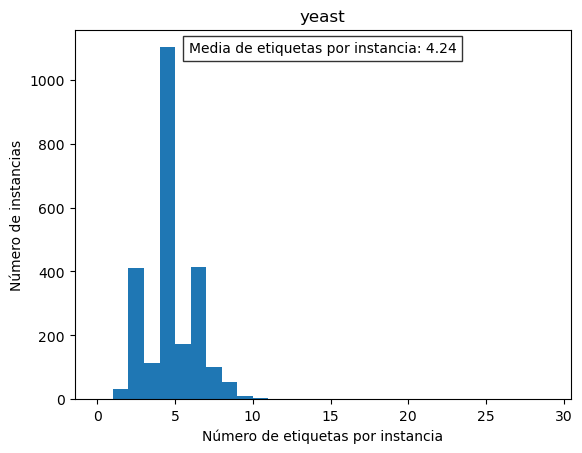

In [77]:
dataset_name = "yeast"

get_dataset_info(dataset_name)

visualize_label_number(dataset_name)